# Deep Learning model for building a handwritten digit classifier. We will make use of the MNIST dataset included in the torchvision package.

In [1]:
import torch
from torchvision.datasets import MNIST
from torchvision import transforms

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])

In [3]:
train_set = MNIST(root='./data', train=True, download=False, transform=transform)
test_set = MNIST(root='./data', train=False, download=False, transform=transform)

In [4]:
len(train_set)

60000

In [5]:
len(test_set)

10000

In [6]:
import numpy as np
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

In [7]:
train_num = len(train_set)
train_num

60000

In [8]:
idx = list(range(train_num))

In [9]:
np.random.shuffle(idx)

In [10]:
idx

[23249,
 32857,
 2718,
 1608,
 22233,
 45212,
 35708,
 50627,
 1085,
 37296,
 48587,
 474,
 32154,
 52142,
 50122,
 22030,
 19993,
 24918,
 42348,
 57436,
 57988,
 56924,
 3789,
 29379,
 55164,
 51404,
 20552,
 48655,
 39010,
 6461,
 13842,
 31873,
 46796,
 33636,
 14338,
 59382,
 17040,
 3044,
 21035,
 49906,
 51900,
 40479,
 17213,
 40436,
 41349,
 56478,
 36489,
 10668,
 37837,
 40137,
 47390,
 7082,
 44853,
 53581,
 19735,
 12060,
 41218,
 21727,
 48759,
 612,
 56545,
 55602,
 59544,
 33566,
 6060,
 53564,
 4420,
 58138,
 20015,
 39901,
 38896,
 46025,
 45362,
 41747,
 12340,
 43402,
 17466,
 51535,
 29742,
 45861,
 20996,
 59108,
 47304,
 59455,
 6754,
 12756,
 39559,
 59524,
 15623,
 27068,
 31821,
 27177,
 17811,
 48644,
 35343,
 13595,
 22415,
 48768,
 7739,
 18611,
 50455,
 49030,
 39456,
 16504,
 39180,
 39649,
 39430,
 34329,
 57309,
 13701,
 51026,
 10775,
 30927,
 52556,
 8542,
 7592,
 22477,
 53762,
 56277,
 38491,
 26851,
 51549,
 6352,
 23769,
 40648,
 2688,
 36673,
 10

In [11]:
batch_size = 50
val_size = 0.2

In [12]:
split = int(np.floor(val_size * train_num))
split

12000

In [13]:
train_idx, valid_idx = idx[split:], idx[:split]

In [14]:
len(train_idx)

48000

In [15]:
train_idx

[33942,
 2741,
 13770,
 10282,
 31854,
 24297,
 55321,
 47073,
 24539,
 11619,
 43038,
 1183,
 2327,
 373,
 17063,
 27863,
 49829,
 57097,
 34764,
 2254,
 18819,
 41462,
 15815,
 21866,
 37134,
 58447,
 42310,
 10117,
 43330,
 13635,
 10208,
 16004,
 7021,
 55785,
 50849,
 49616,
 53227,
 13821,
 47740,
 12554,
 33091,
 9669,
 49707,
 3790,
 53398,
 17478,
 50583,
 6984,
 10631,
 55375,
 19081,
 51058,
 21315,
 38527,
 29054,
 5890,
 44253,
 2282,
 34983,
 29500,
 23269,
 11371,
 27547,
 7012,
 31359,
 15064,
 18276,
 37776,
 36280,
 50170,
 29422,
 49265,
 39549,
 18549,
 3505,
 23395,
 20711,
 36894,
 40637,
 8914,
 57533,
 59296,
 41895,
 56853,
 49833,
 53101,
 27849,
 46713,
 57792,
 9543,
 52123,
 37279,
 53755,
 28023,
 17497,
 7887,
 45596,
 29152,
 18909,
 19340,
 57814,
 22885,
 14759,
 50191,
 49824,
 18631,
 8114,
 31645,
 27728,
 37100,
 23351,
 53039,
 2887,
 57940,
 58496,
 20781,
 8488,
 25038,
 14159,
 51014,
 37286,
 37576,
 9881,
 50474,
 43515,
 3418,
 30422,
 58086

In [16]:
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

train_sampler

In [17]:
train_loader = DataLoader(train_set, batch_size=batch_size, sampler=train_sampler)
test_loader = DataLoader(test_set, batch_size=batch_size)
valid_loader = DataLoader(train_set, batch_size=batch_size, sampler=valid_sampler )

In [18]:
for features, target in train_loader:
    print(features.shape)
    print(target.shape)
    break

torch.Size([50, 1, 28, 28])
torch.Size([50])


## Training model  without drop or regularizaiton

In [31]:
from torch import nn, optim
from torch.nn import functional as F

In [32]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 56)
        self.fc5 = nn.Linear(56, 10)
        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))

        x = self.fc5(x)
        
        return x

In [33]:
model = Model()

In [34]:
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=0.01 , weight_decay=0.01)

In [35]:
mean_train_loss , mean_valid_loss = [], []

for epoch in range(1,20):
    train_loss, valid_loss = [], []
    

    model.train()
    for features, target in train_loader:

        # Zero the parameter gradients
        optimizer.zero_grad()

        output = model(features)

        # Calculate the loss
        loss = criterion(output, target)

        # Backward propagation
        loss.backward()

        # Weights optimization
        optimizer.step()
        train_loss.append(loss.item())

    with torch.no_grad():
        model.eval()
        for features, target in valid_loader:
            output = model(features)
            loss = criterion(output, target)
            valid_loss.append(loss.item())
    mean_train_loss.append(np.mean(train_loss))
    mean_valid_loss.append(np.mean(valid_loss))
    print ("Epoch:", epoch, "Training Loss: ", np.mean(train_loss), "Validation Loss: ", np.mean(valid_loss))

Epoch: 1 Training Loss:  1.8646404337137938 Validation Loss:  0.793484377861023
Epoch: 2 Training Loss:  0.5291253194678575 Validation Loss:  0.4257857746755083
Epoch: 3 Training Loss:  0.352147483592853 Validation Loss:  0.32445706656823553
Epoch: 4 Training Loss:  0.274453946777309 Validation Loss:  0.26393542733664316
Epoch: 5 Training Loss:  0.22645285920007155 Validation Loss:  0.2252714463509619
Epoch: 6 Training Loss:  0.19609267143144582 Validation Loss:  0.20487402154443166
Epoch: 7 Training Loss:  0.17749144511374956 Validation Loss:  0.1918751019363602
Epoch: 8 Training Loss:  0.1628439234259228 Validation Loss:  0.17858845762287576
Epoch: 9 Training Loss:  0.15258056857661964 Validation Loss:  0.1766374010282258
Epoch: 10 Training Loss:  0.14331134079451052 Validation Loss:  0.16891194659595687
Epoch: 11 Training Loss:  0.13684221653578182 Validation Loss:  0.15821806667372584
Epoch: 12 Training Loss:  0.12952027518379813 Validation Loss:  0.15713057789641122
Epoch: 13 Trai

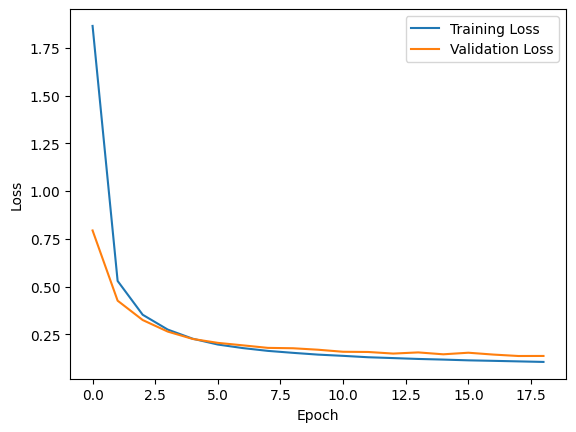

In [36]:
import matplotlib.pyplot as plt

plt.plot(mean_train_loss)
plt.plot(mean_valid_loss)
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

## With Dropout

In [133]:

class DropModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 56)
        self.fc5 = nn.Linear(56, 10)
        
        #drop out with 0.3 probability
        self.dropout = nn.Dropout(p=0.3)
        
    def forward(self, x):
        # input tensor is flattened 
        x = x.view(x.shape[0], -1)
        
        # applied dropout layer
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        x = self.dropout(F.relu(self.fc4(x)))
        
        #no dropout at the output layer
        x = self.fc5(x)
        
        return x

In [134]:
model_dropout =  DropModel()

In [135]:
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model_dropout.parameters(), lr=0.01)

In [136]:
mean_train_loss , mean_valid_loss = [], []

for epoch in range(1,26):
    train_loss, valid_loss = [], []
    

    model_dropout.train()
    for features, target in train_loader:

        # Zero the parameter gradients
        optimizer.zero_grad()

        output = model_dropout(features)

        # Calculate the loss
        loss = criterion(output, target)

        # Backward propagation
        loss.backward()

        # Weights optimization
        optimizer.step()
        train_loss.append(loss.item())

    with torch.no_grad():
        model_dropout.eval()
        for features, target in valid_loader:
            output = model_dropout(features)
            loss = criterion(output, target)
            valid_loss.append(loss.item())
    mean_train_loss.append(np.mean(train_loss))
    mean_valid_loss.append(np.mean(valid_loss))
    print ("Epoch:", epoch, "Training Loss: ", np.mean(train_loss), "Validation Loss: ", np.mean(valid_loss))

Epoch: 1 Training Loss:  2.0492627767225104 Validation Loss:  0.9989716877539953
Epoch: 2 Training Loss:  0.8447944395554562 Validation Loss:  0.42802623653163513
Epoch: 3 Training Loss:  0.5094300963295003 Validation Loss:  0.3103246966376901
Epoch: 4 Training Loss:  0.3829373114897559 Validation Loss:  0.2402252282636861
Epoch: 5 Training Loss:  0.3055163167960321 Validation Loss:  0.20019868237432092
Epoch: 6 Training Loss:  0.2574398551718332 Validation Loss:  0.1739602499563868
Epoch: 7 Training Loss:  0.22458299724967218 Validation Loss:  0.159617558591223
Epoch: 8 Training Loss:  0.19936255040811374 Validation Loss:  0.14243416463141328
Epoch: 9 Training Loss:  0.180855649150908 Validation Loss:  0.13229885860734308
Epoch: 10 Training Loss:  0.16253898297436536 Validation Loss:  0.1235804561971842
Epoch: 11 Training Loss:  0.1460603108474364 Validation Loss:  0.11385414017713628
Epoch: 12 Training Loss:  0.134358370291496 Validation Loss:  0.10932653829513583
Epoch: 13 Training 

In [137]:
mean_train_loss

[np.float64(2.0492627767225104),
 np.float64(0.8447944395554562),
 np.float64(0.5094300963295003),
 np.float64(0.3829373114897559),
 np.float64(0.3055163167960321),
 np.float64(0.2574398551718332),
 np.float64(0.22458299724967218),
 np.float64(0.19936255040811374),
 np.float64(0.180855649150908),
 np.float64(0.16253898297436536),
 np.float64(0.1460603108474364),
 np.float64(0.134358370291496),
 np.float64(0.12667631481017452),
 np.float64(0.11851400821566736),
 np.float64(0.10799037874967325),
 np.float64(0.09853471857544112),
 np.float64(0.09528624199592742),
 np.float64(0.09008867773178887),
 np.float64(0.08581469607452163),
 np.float64(0.08152384365675971),
 np.float64(0.07366497631034387),
 np.float64(0.07101353698405242),
 np.float64(0.06793813564824329),
 np.float64(0.06353153372256201),
 np.float64(0.06326937018942165)]

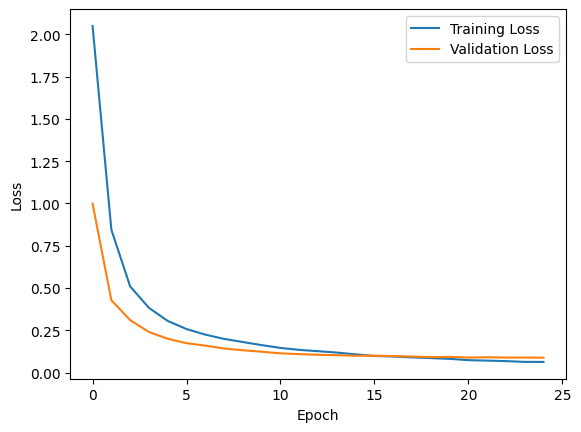

In [140]:
import matplotlib.pyplot as plt

plt.plot(mean_train_loss)
plt.plot(mean_valid_loss)
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [30]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for evaluation

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    # print(data.size(0))
    test_loss += loss.item()*data.size(0)
    #test_loss.append(loss.item())
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # print(pred)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # print(correct[1].item())
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
False
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
False
50
True
50
True
50
False
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
False
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
False
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
False
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50
True
50